In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [6]:
cd /gdrive/My Drive/Colab Notebooks/ML PRACTICAL/Naive Bayes

/gdrive/My Drive/Colab Notebooks/ML PRACTICAL/Naive Bayes


In [10]:
wine.data = pd.read_csv('wine.csv')

In [11]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [12]:
# print data(feature)shape
wine.data.shape

(178, 14)

In [13]:
# print the wine data features (top 5 records)
print(wine.data[0:5])

   Wine  Alcohol  Malic.acid   Ash  ...  Color.int   Hue    OD  Proline
0     1    14.23        1.71  2.43  ...       5.64  1.04  3.92     1065
1     1    13.20        1.78  2.14  ...       4.38  1.05  3.40     1050
2     1    13.16        2.36  2.67  ...       5.68  1.03  3.17     1185
3     1    14.37        1.95  2.50  ...       7.80  0.86  3.45     1480
4     1    13.24        2.59  2.87  ...       4.32  1.04  2.93      735

[5 rows x 14 columns]


In [14]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [15]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) 

In [16]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [17]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


**Advantages**
It is not only a simple approach but also a fast and accurate method for prediction.
Naive Bayes has very low computation cost.
It can efficiently work on a large dataset.
It performs well in case of discrete response variable compared to the continuous variable.
It can be used with multiple class prediction problems.
It also performs well in the case of text analytics problems.
When the assumption of independence holds, a Naive Bayes classifier performs better compared to other models like logistic regression.
**Disadvantages**
The assumption of independent features. In practice, it is almost impossible that model will get a set of predictors which are entirely independent.
If there is no training tuple of a particular class, this causes zero posterior probability. In this case, the model is unable to make predictions. This problem is known as Zero Probability/Frequency Problem.

**PLAY OR NOT PLAY**

In [19]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [20]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [21]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [22]:
#Combinig weather and temp into single list of tuples
features = list(zip(weather_encoded,temp_encoded))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [23]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features, label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print ("Predicted Value:", predicted)

Predicted Value: [1]


Predicted Value: [1]
Here, 1 indicates that players can 'play'.

**RUN OR WALK**

In [24]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

In [25]:
df = pd.read_csv("run_or_walk.csv")
df.shape

(88588, 11)

In [26]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


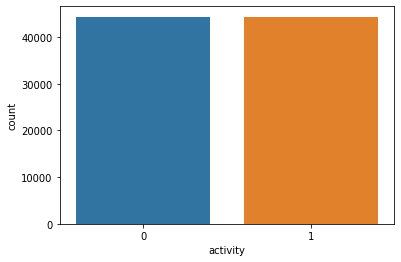

In [27]:
sns.countplot('activity', data =df)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [29]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [30]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, 5:].values,df.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
print(X_train.shape)
print(y_test[0:10])

(70870, 6)
[1 0 0 1 1 1 0 1 1 1]


In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [33]:
classifier.fit(X_train,y_train)

GaussianNB()

In [34]:
y_predict = classifier.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy = accuracy_score(y_predict,y_test)

In [37]:
print(accuracy)

0.9554690145614629


In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
conf_mat =confusion_matrix(y_predict,y_test)

In [40]:
print(conf_mat)

[[8583  699]
 [  90 8346]]


In [41]:
from sklearn.metrics import classification_report
target_names = ["Walk","Run"]

In [42]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

        Walk       0.92      0.99      0.96      8673
         Run       0.99      0.92      0.95      9045

    accuracy                           0.96     17718
   macro avg       0.96      0.96      0.96     17718
weighted avg       0.96      0.96      0.96     17718



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [44]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, [5,6,7]].values,df.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [45]:
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
accuracy_score(y_predict,y_test)

0.9565978101365843

In [46]:
print(conf_mat)

[[8583  699]
 [  90 8346]]
